In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.fftpack import fft
import numpy as np
import seaborn as sns
import csv

# Đường dẫn đến tệp dữ liệu
original_file_path = 'crude_oil_imports.csv'
selected_file_path = 'selected_crude_oil_imports.csv'

In [15]:
### Block 1: Tiền xử lý dữ liệu và lưu file CSV đã chọn
def preprocess_and_save_data(file_path, output_file):
    """
    Lựa chọn các cột cần thiết và lưu vào file CSV mới.
    """
    data = pd.read_csv(file_path)
    selected_columns = data[['Period', 'Quantity', 'Origin ID', 'Origin Country', 'Grade ID', 'Grade Name', 'Destination ID', 'Destination Type']]
    selected_columns['Period'] = pd.to_datetime(selected_columns['Period'], errors='coerce')
    selected_columns.to_csv(output_file, index=False)
    print("Dữ liệu đã được lưu vào tệp:", output_file)

preprocess_and_save_data(original_file_path, selected_file_path)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18816\2133180290.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Period'] = pd.to_datetime(selected_columns['Period'], errors='coerce')


Dữ liệu đã được lưu vào tệp: selected_crude_oil_imports.csv


In [16]:
### Block 2: Hàm tải và xử lý dữ liệu
def load_and_process_data(file_path):
    """
    Đọc dữ liệu đã chọn từ file CSV, xử lý dữ liệu và trả về dữ liệu tổng hợp theo tháng.
    """
    data = pd.read_csv(file_path)
    data['Period'] = pd.to_datetime(data['Period'], errors='coerce')
    monthly_data = data.groupby(data['Period'].dt.to_period('M'))['Quantity'].sum()
    monthly_data.index = monthly_data.index.to_timestamp()
    return monthly_data, data

# Sử dụng hàm để lấy dữ liệu đã xử lý
monthly_data, data = load_and_process_data(selected_file_path)

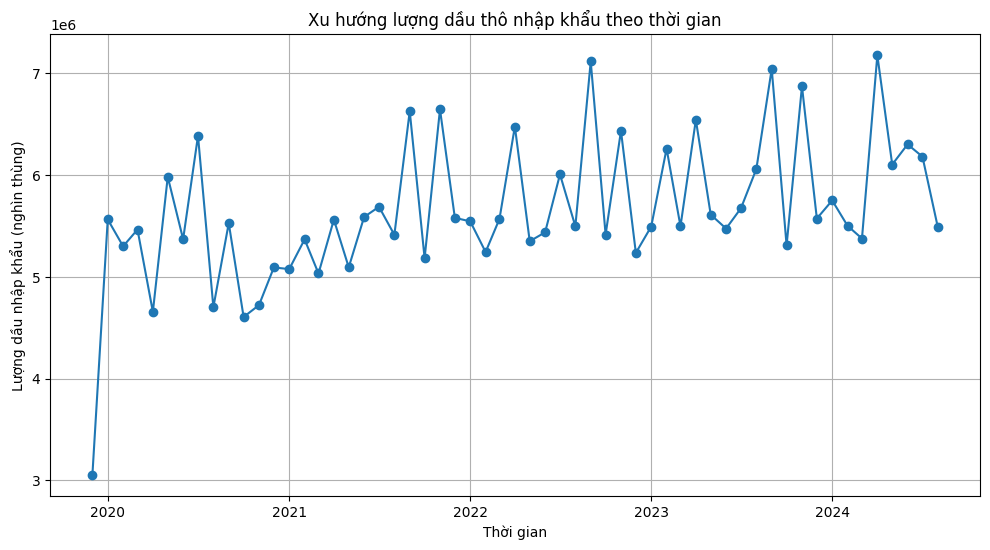

In [17]:
### Block 3: Vẽ biểu đồ xu hướng (Trend)
def plot_trend(data):
    """
    Vẽ biểu đồ xu hướng của lượng dầu thô nhập khẩu theo thời gian.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data, marker='o', linestyle='-')
    plt.title("Xu hướng lượng dầu thô nhập khẩu theo thời gian")
    plt.xlabel("Thời gian")
    plt.ylabel("Lượng dầu nhập khẩu (nghìn thùng)")
    plt.grid(True)
    plt.show()

plot_trend(monthly_data)

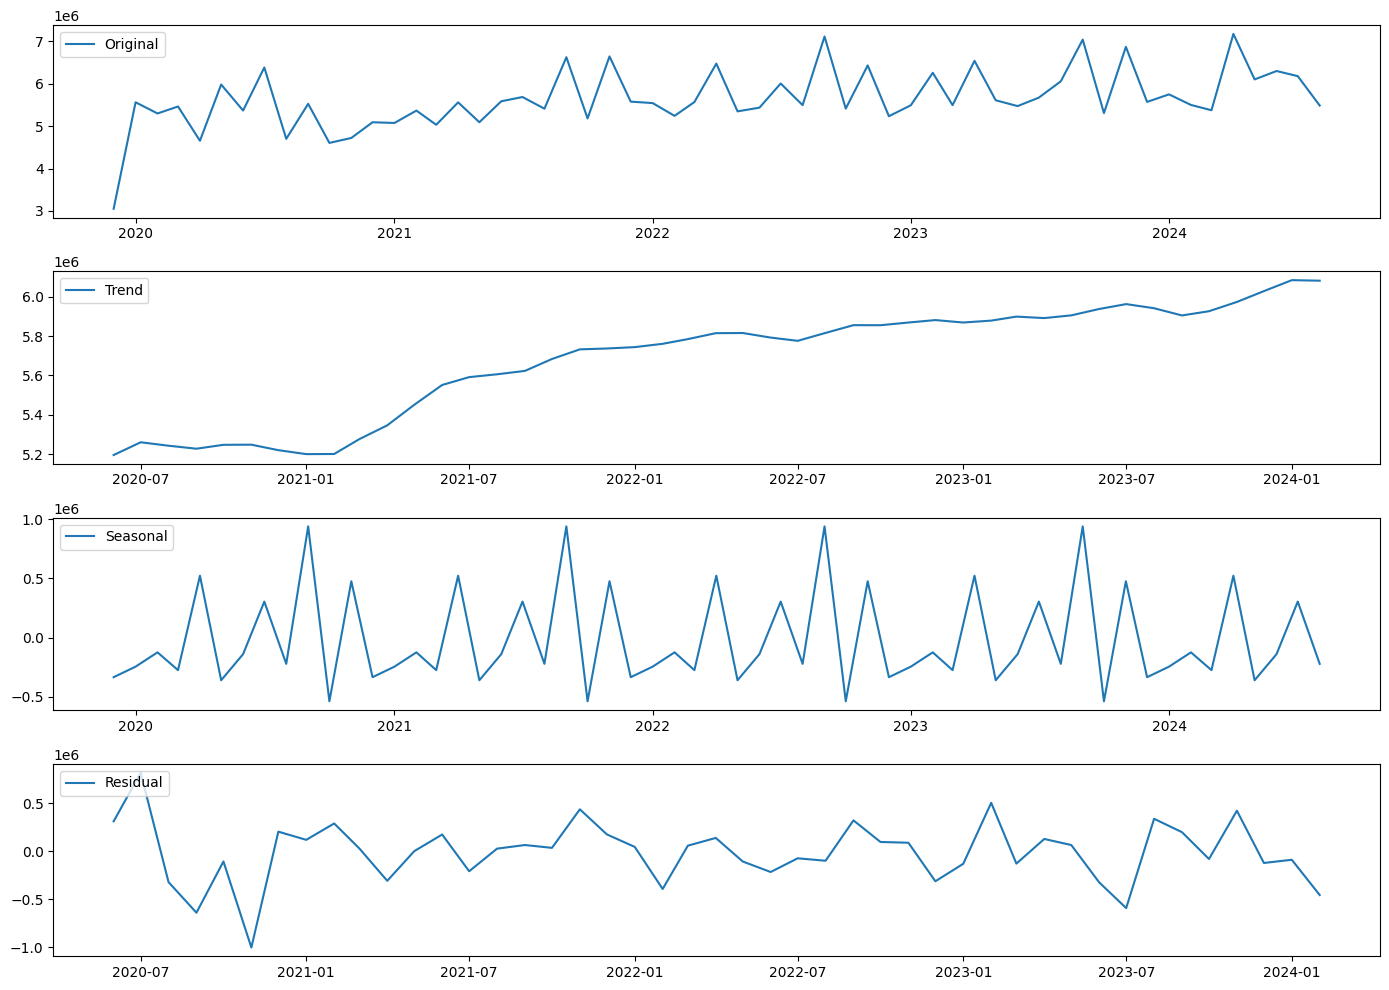

In [18]:
### Block 4: Phân tích mùa vụ (Seasonal Decomposition)
def plot_seasonal_decomposition(data):
    """
    Phân tích và hiển thị các thành phần xu hướng, mùa vụ, và nhiễu của dữ liệu.
    """
    decomposition = seasonal_decompose(data, model='additive', period=12)
    plt.figure(figsize=(14, 10))
    plt.subplot(411)
    plt.plot(decomposition.observed, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

plot_seasonal_decomposition(monthly_data)

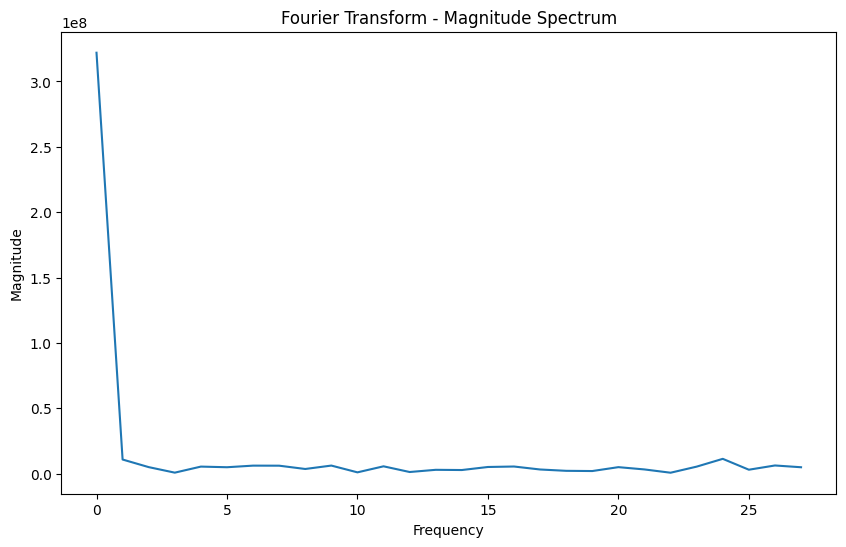

In [19]:
### Block 5: Phân tích chu kỳ (Cycle Analysis) với Fourier Transform
def plot_fourier_transform(data):
    """
    Phân tích chu kỳ bằng Fourier Transform và hiển thị phổ tần số.
    """
    quantity_values = data.values
    fft_result = fft(quantity_values)
    magnitude = np.abs(fft_result)
    plt.figure(figsize=(10, 6))
    plt.plot(magnitude[:len(magnitude)//2])
    plt.title("Fourier Transform - Magnitude Spectrum")
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.show()

plot_fourier_transform(monthly_data)

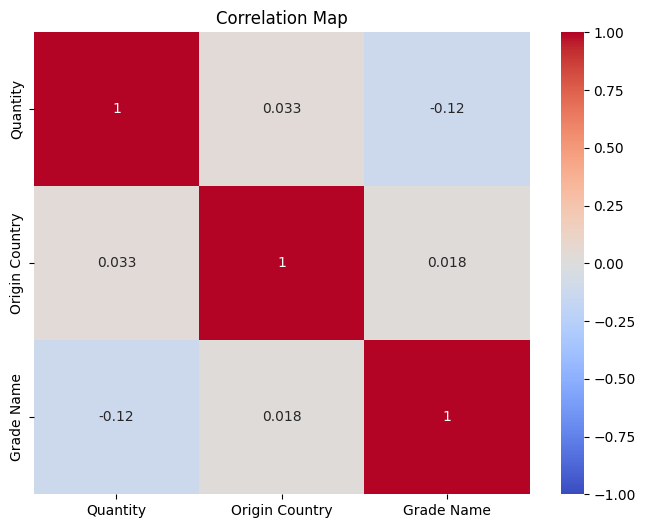

In [ ]:
# ### Block 6: Bản đồ tương quan (Correlation Map)
# def plot_correlation_map(data):
#     """
#     Tạo bản đồ tương quan giữa các biến trong dữ liệu.
#     """
#     data_encoded = data.copy()
#     data_encoded['Origin Country'] = data_encoded['Origin Country'].astype('category').cat.codes
#     data_encoded['Grade Name'] = data_encoded['Grade Name'].astype('category').cat.codes
#     correlation_matrix = data_encoded[['Quantity', 'Origin Country', 'Grade Name']].corr()
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#     plt.title("Correlation Map")
#     plt.show()

# plot_correlation_map(data)

                Quantity  Origin ID  Destination ID  Grade ID
Quantity        1.000000   0.040310        0.046912 -0.124681
Origin ID       0.040310   1.000000       -0.022338  0.012506
Destination ID  0.046912  -0.022338        1.000000 -0.011679
Grade ID       -0.124681   0.012506       -0.011679  1.000000


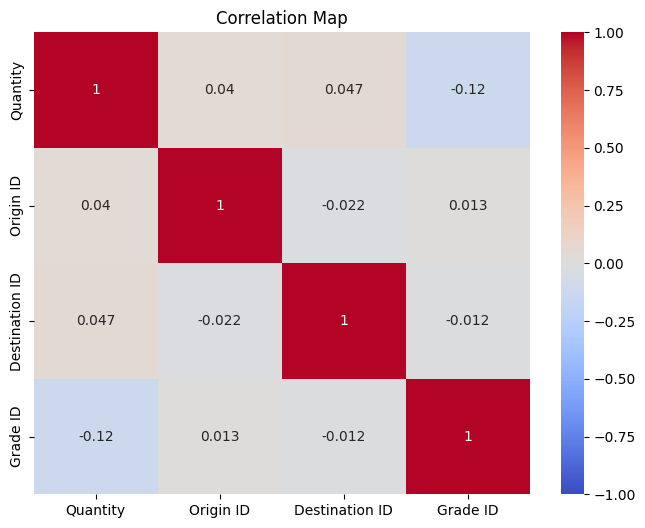

In [26]:
# Block 6: Bản đồ tương quan (Correlation Map)
def plot_correlation_map(data):
    """
    Tạo bản đồ tương quan giữa các biến trong dữ liệu.
    """
    data_encoded = data.copy()
    
    # Mã hóa các cột có giá trị danh mục thành mã số
    data_encoded['Origin ID'] = data_encoded['Origin ID'].astype('category').cat.codes
    data_encoded['Destination ID'] = data_encoded['Destination ID'].astype('category').cat.codes
    data_encoded['Grade ID'] = data_encoded['Grade ID'].astype('category').cat.codes
    
    # Tạo ma trận tương quan với các cột số liệu và mã hóa
    correlation_matrix = data_encoded[['Quantity', 'Origin ID', 'Destination ID', 'Grade ID']].corr()
    print(correlation_matrix)
    # Vẽ bản đồ tương quan
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Correlation Map")
    plt.show()

# Gọi hàm với dữ liệu
plot_correlation_map(data)


In [ ]:
import json

# Block code để lưu ma trận tương quan thành file JSON
def save_correlation_matrix_to_json(data, filename):
    """
    Lưu ma trận tương quan thành file JSON.
    """
    data_encoded = data.copy()
    data_encoded['Origin ID'] = data_encoded['Origin ID'].astype('category').cat.codes
    data_encoded['Destination ID'] = data_encoded['Destination ID'].astype('category').cat.codes
    data_encoded['Grade ID'] = data_encoded['Grade ID'].astype('category').cat.codes

    # Tạo ma trận tương quan với các cột số liệu và mã hóa
    correlation_matrix = data_encoded[['Quantity', 'Origin ID', 'Destination ID', 'Grade ID']].corr()

    # In ma trận tương quan để kiểm tra thứ tự
    print("Correlation Matrix:")
    print(correlation_matrix)

    # Lưu ma trận tương quan với cấu trúc `list` để giữ nguyên thứ tự
    correlation_data = {
        "labels": correlation_matrix.columns.tolist(),
        "matrix": correlation_matrix.values.tolist()
    }

    # Lưu vào file JSON
    with open(filename, 'w') as f:
        json.dump(correlation_data, f)

# Gọi hàm và lưu file JSON
save_correlation_matrix_to_json(data, 'correlation_matrix.json')


Correlation Matrix:
                Quantity  Origin ID  Destination ID  Grade ID
Quantity        1.000000   0.040310        0.046912 -0.124681
Origin ID       0.040310   1.000000       -0.022338  0.012506
Destination ID  0.046912  -0.022338        1.000000 -0.011679
Grade ID       -0.124681   0.012506       -0.011679  1.000000


In [27]:
data = pd.read_csv('selected_crude_oil_imports.csv')

# Extract year and month from the 'Period' column
data['Year'] = data['Period'].str[:4].astype(int)
data['Month'] = data['Period'].str[5:7].astype(int)

# Define the seasons based on months
season_map = {
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Fall': [9, 10, 11],
    'Winter': [12, 1, 2]
}

# Calculate the average quantity per season per year
seasonal_data = []
for year in range(2020, 2025):
    year_data = {'Year': year}
    for season, months in season_map.items():
        # Filter data for each season and year
        season_data = data[(data['Year'] == year) & (data['Month'].isin(months))]
        # Calculate total quantity for the season in that year
        year_data[season] = season_data['Quantity'].sum()
    seasonal_data.append(year_data)

# Convert to DataFrame and save as CSV for ReactJS
seasonal_df = pd.DataFrame(seasonal_data)
seasonal_df.to_csv('seasonal_averages_by_year.csv', index=False)

seasonal_df


,Year,Spring,Summer,Fall,Winter
0,2020,16104713,16458120,14856197,15957918
1,2021,15690292,16690423,18458653,16025007
2,2022,17397578,16942674,18967789,16025765
3,2023,17651877,17209589,19226034,17328464
4,2024,18659303,17971702,0,11252893
